### Building & Zoning Permits

In [1]:
import requests
import pandas as pd
from pandas import json_normalize
pd.set_option("display.max.columns", None)

base_url = "https://phl.carto.com/api/v2/sql"
query = """
SELECT * FROM permits
"""

params = {
    "q":query
}

results = requests.get(base_url, params)

data = results.json()

permits = pd.DataFrame(data['rows'])

permits.head()

cartodb_id                                           the_geom  \
0           1  0101000020E6100000FA4C8ECC99C452C0A479AFFF1D04...   
1           2  0101000020E61000009F4543890ACA52C0A1731D39C1FE...   
2           3  0101000020E6100000440CD0ED01C852C0B976292B4BFE...   
3           4  0101000020E6100000033321CF3DCB52C0D4A44884C1F8...   
4           5  0101000020E610000071E20BE58DCC52C0BB42918EDEF7...   

                                the_geom_webmercator  objectid  \
0  0101000020110F000098DE041019E15FC18E2945657694...         1   
1  0101000020110F0000E5B349C456EA5FC1BB4C2E2C848E...         2   
2  0101000020110F0000324C8676E2E65FC1B5D4464F018E...         3   
3  0101000020110F0000726C62B360EC5FC194522B63DE87...         4   
4  0101000020110F0000C9A471939BEE5FC180C65DFBE286...         5   

     permitnumber addressobjectid parcel_id_num            permittype  \
0  PP-2025-005405       130758519        507286              Plumbing   
1  GM-2022-004970       132124745        353402  General Permit Minor   
2         1044818       136769033        124254            Electrical   
3  RP-2022-010840        15383756        202367  Residential Building   
4         1008940        15778004        123258                Zoning   

             permitdescription commercialorresidential  \
0              Plumbing Permit             Residential   
1         General Permit Minor             Residential   
2            Electrical Permit              Commercial   
3  Residential Building Permit             Residential   
4                Zoning Permit             Residential   

                               typeofwork  \
0                             Alterations   
1            EZ Roof Covering Replacement   
2                        New Construction   
3              Addition and/or Alteration   
4  New construction, addition, GFA change   

                                 approvedscopeofwork       permitissuedate  \
0                    Repair section of house drain.   2025-04-24T04:00:00Z   
1  For minor construction work at the subject pro...  2022-06-09T04:00:00Z   
2  NEW 300 AMP SERVICE, 4 GANG METER PACK 100AMP ...  2020-05-08T04:00:00Z   
3  For the erection of an addition to an existing...  2023-01-19T05:00:00Z   
4  FOR THE ERECTION OF AN ATTACHED STRUCTURE WITH...  2020-07-08T20:02:18Z   

      status                applicanttype                contractorname  \
0  Completed  Professional / Tradesperson  ROTO-ROOTER SERVICE CO. INC.   
1    Expired  Professional / Tradesperson                          None   
2  Completed                        Owner       STAR LIGHT ELECTRIC INC   
3  Completed  Professional / Tradesperson           DETAIL EXCHANGE LLC   
4     Issued                        Owner                          None   

                                  contractoraddress1 contractoraddress2  \
0  ROTO-ROOTER SERVICE CO. INC.\r\n2554 Ford Road...               None   
1                                               None               None   
2  STAR LIGHT ELECTRIC INC\r\n3353-55 MILLER ST\r...               None   
3  DETAIL EXCHANGE LLC\r\n136 PITMAN DOWNER RD\r\...               None   
4                                               None               None   

  contractorcity contractorstate contractorzip        mostrecentinsp  \
0           None            None          None  2025-04-25T13:31:23Z   
1           None            None          None  2022-06-24T12:32:43Z   
2           None            None          None  2021-06-24T12:30:52Z   
3           None            None          None  2023-09-08T18:09:18Z   
4           None            None          None                  None   

  opa_account_num             address unit_type unit_num         zip  \
0       621216500  2014 DEVEREAUX AVE      None     None  19149-3524   
1       161029200      2431 N 15TH ST      None     None  19132-4434   
2       881299400     2613 EMERALD ST      None     None  19125-1123   
3       301082700   2006 PEMBERTON ST      Non

In [2]:
print("\nCoordinate ranges:")
print("geocode_x range:", permits['geocode_x'].min(), "to", permits['geocode_x'].max())
print("geocode_y range:", permits['geocode_y'].min(), "to", permits['geocode_y'].max())
# Pennslyvania state plane baby!


Coordinate ranges:
geocode_x range: 2662243.133715 to 2749427.87880706
geocode_y range: 207590.2231899 to 304695.42609222


In [3]:
print("Available columns:", permits.columns.tolist())

Available columns: ['cartodb_id', 'the_geom', 'the_geom_webmercator', 'objectid', 'permitnumber', 'addressobjectid', 'parcel_id_num', 'permittype', 'permitdescription', 'commercialorresidential', 'typeofwork', 'approvedscopeofwork', 'permitissuedate', 'status', 'applicanttype', 'contractorname', 'contractoraddress1', 'contractoraddress2', 'contractorcity', 'contractorstate', 'contractorzip', 'mostrecentinsp', 'opa_account_num', 'address', 'unit_type', 'unit_num', 'zip', 'censustract', 'council_district', 'opa_owner', 'systemofrecord', 'geocode_x', 'geocode_y', 'posse_jobid', 'usecategories', 'occupancytype', 'numberofunits', 'certificateofoccupancyrequired', 'certificateofoccupancydate', 'permitcompleteddate']


'permitdescription', 'commercialorresidential', and 'typeofwork' are the columns of interest. Filtering these will show residential zoning permits where the permit is seeking a "change of use." While not a variance, seeing areas with lots of these might allude to an increasingly residential area which could signify housing demand. 

In [4]:
# Filtering for residential zoning permits specifically & the type of permit being a change of use permit
permits = permits[
    (permits['permitdescription'] == 'Zoning Permit') & 
    (permits["commercialorresidential"] == "Residential") & 
    (permits["typeofwork"] == "Change of Use")
]

permits = permits[
    (permits["approvedscopeofwork"].str.contains("Two-Family", na=False)) |
    (permits["approvedscopeofwork"].str.contains("Multi-Family", na=False))
]

permits.head()

cartodb_id                                           the_geom  \
22           23  0101000020E6100000891E51A5ACC952C045454631D4FE...   
51           52  0101000020E6100000913BEE109FC952C0FAA6B5A457FF...   
415         416  0101000020E61000003B1414DEADCE52C0773975CAEAFC...   
536         537  0101000020E61000006F1A113AA2CF52C0E48B7F2CC5F9...   
704         705  0101000020E61000000225772F8BC952C018836E8ABD03...   

                                  the_geom_webmercator  objectid  \
22   0101000020110F000095A8D048B7E95FC16E9A6033998E...        23   
51   0101000020110F000090BAD237A0E95FC14F2C3EEC2A8F...        52   
415  0101000020110F00007DA9869137F25FC16D06D3BD7A8C...       399   
536  0101000020110F000090CD2AA3D6F35FC1BB780A0BFE88...       498   
704  0101000020110F00006EB9DA727EE95FC1F7DCF7670B94...       634   

       permitnumber addressobjectid parcel_id_num permittype  \
22   ZP-2022-010981       129462594        392740     Zoning   
51   ZP-2021-011337        15843999         73570     Zoning   
415  ZP-2025-001731        15502896        419789     Zoning   
536  ZP-2023-002012       137339794        355207     Zoning   
704  ZP-2021-011261        15518665        533734     Zoning   

    permitdescription commercialorresidential     typeofwork  \
22      Zoning Permit             Residential  Change of Use   
51      Zoning Permit             Residential  Change of Use   
415     Zoning Permit             Residential  Change of Use   
536     Zoning Permit             Residential  Change of Use   
704     Zoning Permit             Residential  Change of Use   

                             approvedscopeofwork       permitissuedate  \
22   Residential - Household Living - Two-Family  2022-10-14T19:21:40Z   
51   Residential - Household Living - Two-Family  2021-09-20T18:32:15Z   
415  Residential - Household Living - Two-Family  2025-03-07T17:49:15Z   
536  Residential - Household Living - Two-Family  2023-02-21T19:57:32Z   
704  Residential - Household Living - Two-Family  2021-09-23T15:56:53Z   

     status                applicanttype               contractorname  \
22   Issued                        Owner                         None   
51   Issued  Professional / Tradesperson           Ameris Estates LLC   
415  Issued  Professional / Tradesperson  Betzoley Strategic services   
536  Issued                        Owner                         None   
704  Issued  Professional / Tradesperson         A&P CONSTRUCTION LLC   

                                    contractoraddress1 contractoraddress2  \
22                                                None               None   
51   Ameris Estates LLC\r\n1364 Adair Rd\r\nBrookha...               None   
415  Betzoley Strategic services\r\n538 E LURAY ST\...               None   
536                                               None               None   
704  A&P CONSTRUCTION LLC\r\n768 S 7th ST\r\nPhilad...               None   

    contractorcity contractorstate contractorzip mostrecentinsp  \
22            None            None          None           None   
51            None            None          None           None   
415           None            None          None           None   
536           None            None          None           None   
704           None            None          None           None   

    opa_account_num             address unit_type unit_num         zip  \
22        371223300      2521 N 12TH ST      None     None  19133-1124   
51        372333900  1138 W SOMERSET ST      None     None  19133-1221   
415       442361000      1509 N 54TH ST      None     None  19131-4001   
536       032190800   6037 CATHARINE ST      None     None  19143-2305   
704       171041800   1506 W RUSCOMB ST      None     None  19141-2208   

    censustract council_district                 opa_owner systemofrecord  \
22          165                5      LEVEL 4 HOLDINGS LLC        ECLIPSE   
51          174                5   STEWART COURTNEY LIEA

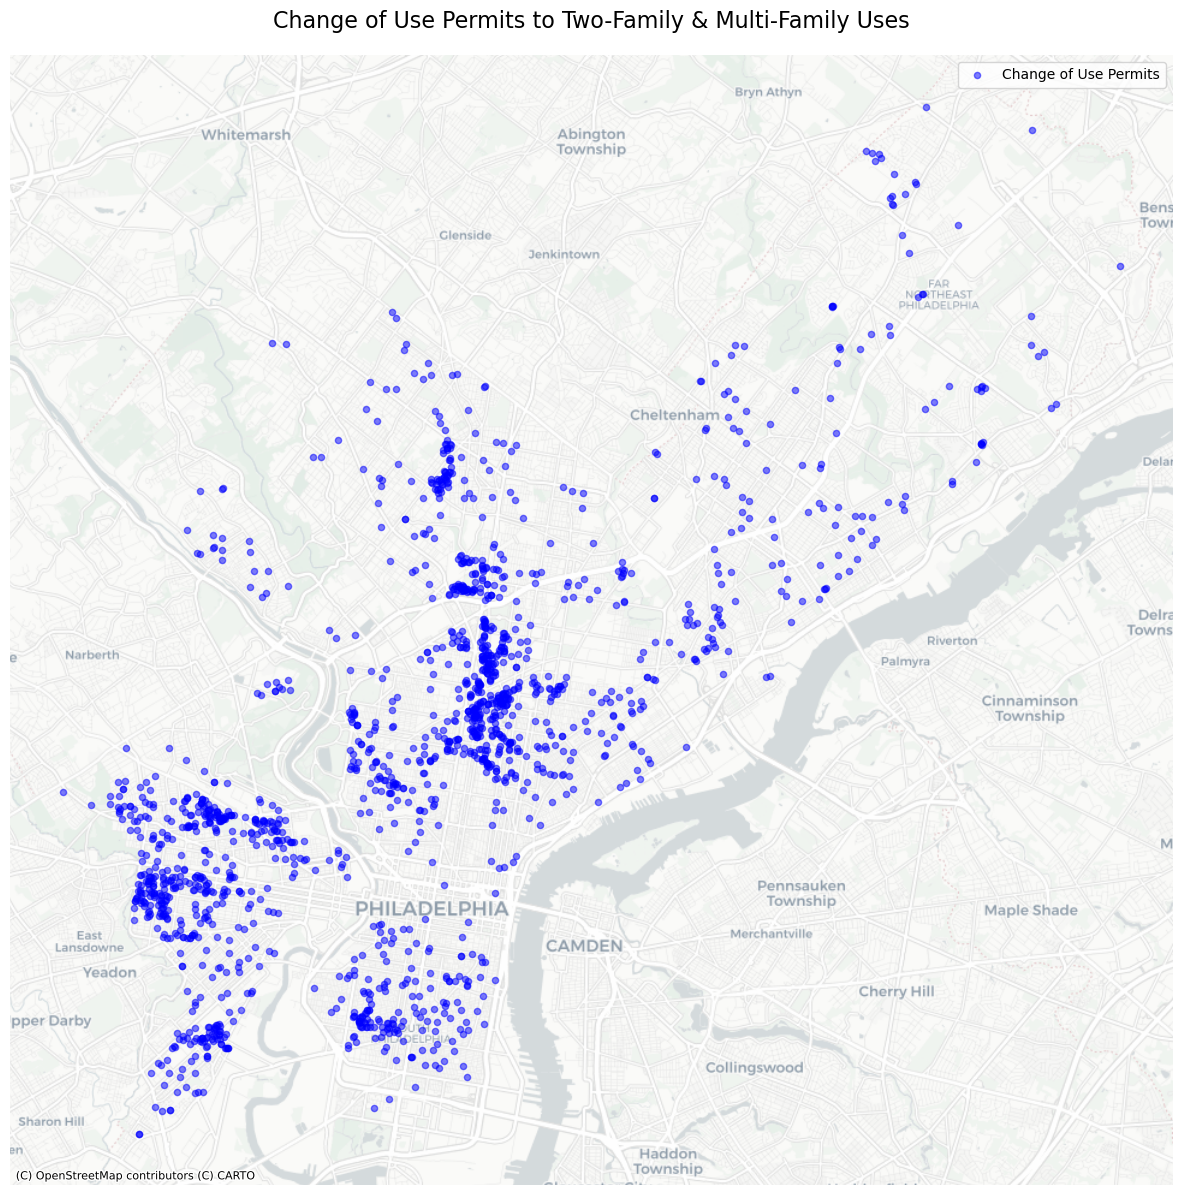

In [5]:
import geopandas as gpd
from pyproj import Transformer
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

# Transformer from PA State Plane to WGS84 (lat/long)
transformer = Transformer.from_crs("EPSG:2272", "EPSG:4326", always_xy=True)

permits['longitude'], permits['latitude'] = transformer.transform(
    permits['geocode_x'].values, 
    permits['geocode_y'].values
)

geometry = [Point(xy) for xy in zip(permits['longitude'], permits['latitude'])]
gdf = gpd.GeoDataFrame(permits, geometry=geometry, crs="EPSG:4326")

fig, ax = plt.subplots(figsize=(15, 15))

gdf_web = gdf.to_crs(epsg=3857)

gdf_web.plot(ax=ax, 
             alpha=0.5, 
             c='blue',
             markersize=20,
             label='Change of Use Permits')

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Plot customization
plt.title('Change of Use Permits to Two-Family & Multi-Family Uses', fontsize=16, pad=20)
ax.set_axis_off()
plt.legend()

plt.show()

# Years are from 2018-2024

In [6]:
districts = gpd.read_file('https://opendata.arcgis.com/api/v3/datasets/1ba5a5d68f4a4c75806e78b1d9245924_0/downloads/data?format=geojson&spatialRefId=4326&where=1%3D1')

In [7]:
districts.head()

OBJECTID_1  OBJECTID DISTRICT     SHAPE_LENG   Shape__Area  Shape__Length  \
0           1         1        1  107319.271435  4.017231e+07   42704.277559   
1           2         2        2  163242.842040  9.866933e+07   64896.883391   
2           3         3        3   92775.194649  3.661869e+07   36906.652590   
3           4         4        4  168377.290984  9.164117e+07   67040.969970   
4           5         5        5   96790.499546  3.095135e+07   38537.014107   

                                            geometry  
0  POLYGON ((-75.11357 39.99447, -75.11272 39.993...  
1  POLYGON ((-75.17260 39.94874, -75.17103 39.948...  
2  POLYGON ((-75.20436 39.97443, -75.20372 39.974...  
3  POLYGON ((-75.23050 40.08271, -75.23036 40.082...  
4  POLYGON ((-75.14258 40.00216, -75.14242 40.001...

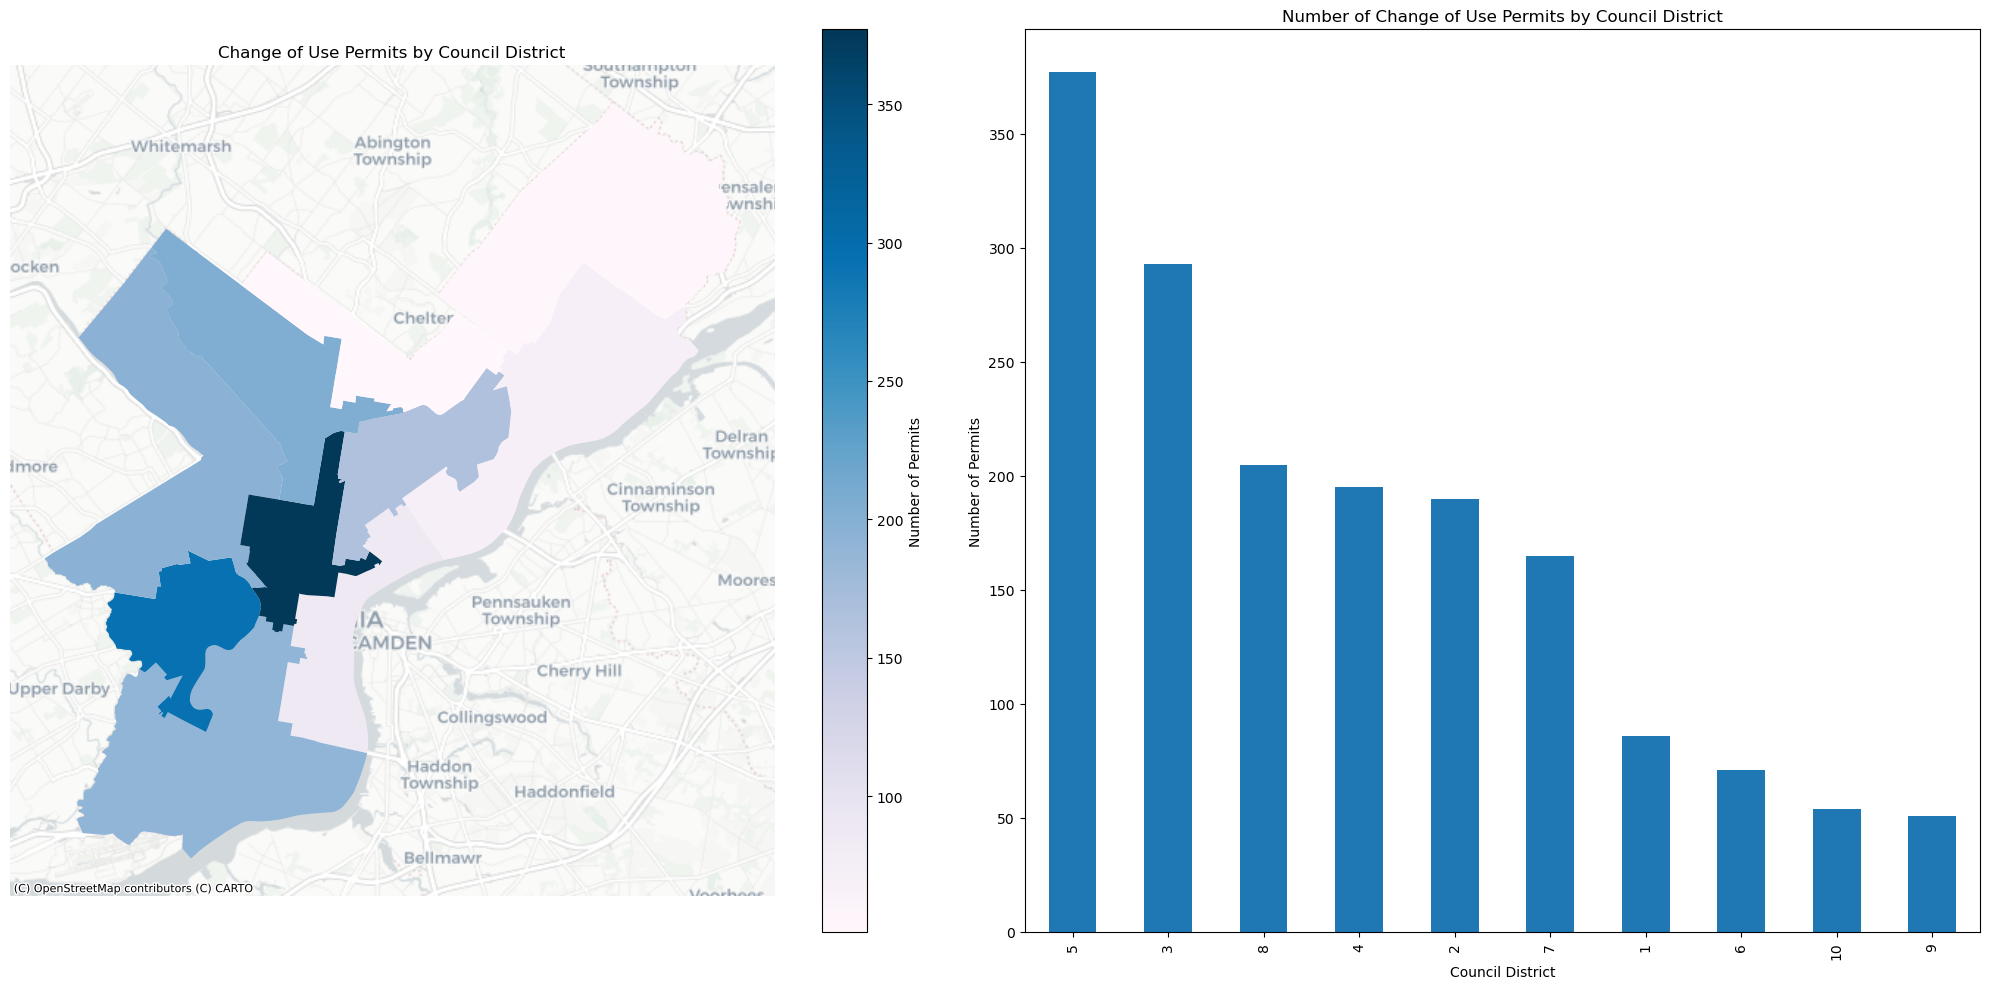

In [8]:
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(permits['longitude'], permits['latitude'])]
permits_gdf = gpd.GeoDataFrame(permits, geometry=geometry, crs="EPSG:4326")

districts = districts.to_crs(permits_gdf.crs)

# Spatial join permit data & council district data
permits_cc = gpd.sjoin(permits_gdf, districts, how="left", predicate="within")
permits_per_district = permits_cc.groupby('DISTRICT')['permitnumber'].count().sort_values(ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

merged_data = districts.merge(permits_per_district, left_on='DISTRICT', right_index=True)
merged_data = merged_data.to_crs(epsg=3857)
merged_data.plot(column='permitnumber', 
                ax=ax1,
                legend=True,
                cmap='PuBu',
                legend_kwds={'label': 'Number of Permits'},
                missing_kwds={'color': 'lightgrey'})

# Basemap
ctx.add_basemap(ax1, source=ctx.providers.CartoDB.Positron)
ax1.set_axis_off()
ax1.set_title('Change of Use Permits by Council District')

# Bar chart of change of use permits by district
permits_per_district.plot(kind='bar', ax=ax2)
ax2.set_title('Number of Change of Use Permits by Council District')
ax2.set_xlabel('Council District')
ax2.set_ylabel('Number of Permits')

plt.tight_layout()
plt.show()

### Zoning Appeals - Variances for Multi-Family

In [51]:
pd.set_option("display.max.columns", None)
base_url2 = "https://phl.carto.com/api/v2/sql"
query2 = """
SELECT * FROM appeals
"""

params2 = {
    "q":query2
}

results2 = requests.get(base_url2, params2)

data2 = results2.json()

appeals = pd.DataFrame(data2['rows'])

appeals.head()

cartodb_id                                           the_geom  \
0           1  0101000020E61000009A66D30997C952C0FD1B17823CF9...   
1           2  0101000020E61000006C4C4BA2C4C652C02F2BB29A2704...   
2           3  0101000020E6100000DC2903E74FCA52C07711DCA62FF9...   
3           4  0101000020E610000032D60399BDC852C03B703BC5E5FC...   
4           5  0101000020E6100000B8845553CFCA52C0CCDA9A6577F9...   

                                the_geom_webmercator  objectid  \
0  0101000020110F00005A55059592E95FC11EDA01A36688...         1   
1  0101000020110F00008D186981C7E45FC1BCF3D20C8194...         2   
2  0101000020110F000060CC9C97CCEA5FC18327E8645888...         3   
3  0101000020110F00004EFCBC3C21E85FC163A76B2D758C...         4   
4  0101000020110F000069ED8208A5EB5FC10D0846E0A788...         5   

  addressobjectid                address unit_type unit_num         zip  \
0          593815       500-06 WALNUT ST      None     None  19106-3711   
1            2795          799 ADAMS AVE      None     None  19124-2327   
2          547064         1201 SPRUCE ST      None     None  19107-5603   
3          754561  150 CECIL B MOORE AVE      None     None  19122-0000   
4          397995         1629 LOCUST ST      None     None  19103-6304   

  opa_account_num parcel_id_num censustract               opa_owner  \
0       888501268         99332       10.01  500 WALNUT PARTNERS LP   
1       882051160        540184         291          OH SAVINA SOOK   
2       881517950        221809        9.01      1201 SPRUCE ST L P   
3       183013005        540264         157  DESIGN HOLDINGS II LLC   
4       883046300        232156        8.04  ST MARKS ASSOCIATES LP   

         primaryappellant appellanttype  internaljobid appealnumber  \
0    THOMAS P. WITT, ESQ.         OTHER      1510357.0       051499   
1          UAM (JOHN) PAK         OTHER      1015278.0        10001   
2  REED D. LYONS, ESQUIRE         OTHER      1015303.0        10002   
3  JEFFERY SPANN, ESQUIRE         OTHER      1015336.0        10003   
4        LISA WORTHINGTON          APPL      1015346.0        10004   

  acceleratedappeal           createddate         completeddate  \
0              None  2013-02-25T21:11:00Z                  None   
1              None  2009-09-10T18:42:00Z                  None   
2              None  2009-09-10T19:03:07Z  2009-10-30T14:48:30Z   
3              None  2009-09-10T20:01:16Z  2009-12-10T22:04:51Z   
4              None  2009-09-11T12:31:33Z                  None   

                                       relatedpermit relatedcasefile  \
0  Description of Project:  050812081\n  APPEAL T...            None   
1  Description of Project:  233776\n  APPEAL TYPE...            None   
2  Description of Project:  234210\n  APPEAL TYPE...            None   
3  Description of Project:  231549\n  APPEAL TYPE...            None   
4  Description of Project:  210340\n  APPEAL TYPE...            None   

  appealstatus appealtype agendadescription applicationtype meetingnumber  \
0         OPEN       None              None          RB_ZBA          None   
1         OPEN       None              None          RB_ZBA          None   
2       CLOSED       None              None          RB_ZBA          None   
3       CLOSED       None              None          RB_ZBA          None   
4       CLOSED       None              None         RB_LIRB          None   

                                       appealgrounds         scheduleddate  \
0  PERMIT FOR THE RELOCATION OF LOT LINES TO CREA...  2006-02-08T17:30:00Z   
1  PERMIT FOR RETAIL AND WHOLE SALE DISTRIBUTION ...  2009-10-28T18:00:00Z   
2  PERMIT FOR THE ERECTION OF A ROOF DECK LESS TH...  2009-10-21T18:00:00Z   
3  PERMIT FOR LEGALIZATION OF THE ERECTION OF FOU...  2009-10-21T18:00:00Z   
4                        ESTOPPEL, HISTORIC BUILDING  2009-12-15T18:15:00Z   

       decision meetingresult  \
0  GRANTED/PROV          None   
1       GRANTED          None   
2  GRANTED/PROV          

In [52]:
appeals = appeals[
    (appeals['appealtype'] == 'ZBA Permit Denial - Variance')
]

In [53]:
appeals.head()

cartodb_id                                           the_geom  \
56           57  0101000020E610000069B57CCADACA52C07152BC52DBFC...   
189         190  0101000020E6100000764BAD2A6EC952C06576569415F7...   
224         225  0101000020E6100000D859FE156BCE52C0675CB53C9605...   
227         228  0101000020E6100000CD767431D6C752C0A29F8D4EF7FD...   
252         253  0101000020E61000001405C9E443CA52C0649207BF14FC...   

                                  the_geom_webmercator  objectid  \
56   0101000020110F00006D102A82B8EB5FC1B99A4F99698C...        53   
189  0101000020110F000018434F284DE95FC152E6E9600486...       178   
224  0101000020110F00009C021B22C6F15FC1BCF1A2C11796...       212   
227  0101000020110F0000CA60622C98E65FC107767D5AA48D...       215   
252  0101000020110F00006176BA31B8EA5FC1953764878D8B...       242   

    addressobjectid           address unit_type unit_num         zip  \
56        127982554   2000 SEYBERT ST      None     None  19121-4817   
189       135941629       123 REED ST      None     None  19147-6128   
224        15545853    531 LIVEZEY ST      None     None  19128-2419   
227        15461807  2139 E HAROLD ST      None     None  19125-1413   
252        15453232    842 N BROAD ST      None     None  19130-2234   

    opa_account_num parcel_id_num censustract  \
56             None         37094         139   
189       011008500        512032       27.02   
224       213345552        338238         217   
227       314183300        396098         161   
252       882885597        464788         133   

                                             opa_owner  \
56                                                None   
189                                    HARDY CREDIT CO   
224  BLACK WILLIAM ALEXANDER JR TR, WILLIAM ALEXAND...   
227                                      LAYCHOCK JOHN   
252                                     OKOLO EFEDUA E   

                                      primaryappellant appellanttype  \
56              PETER KELSEN, ESQ. DBA: BLANK ROME LLP          None   
189                                       JAMES CLANCY          None   
224  ERNESTINE BLACK ERNESTINE L        BLACK WILLI...          None   
227         JOVANNY RAMOS DBA: SUPREME ARCHITECTS, LLC          None   
252  CHRISTOPHER MENNA DBA: MENNA ENGINEERS & ASSOC...          None   

     internaljobid appealnumber   acceleratedappeal           createddate  \
56             NaN      1006497  Accelerated Appeal  2020-07-21T20:57:36Z   
189            NaN      1022448  Accelerated Appeal  2021-03-25T19:50:07Z   
224            NaN      1025998     Standard Appeal  2020-07-08T16:19:44Z   
227            NaN      1026092     Standard Appeal  2020-08-24T14:54:12Z   
252            NaN      1029072  Accelerated Appeal  2020-05-19T19:37:10Z   

            completeddate relatedpermit relatedcasefile appealstatus  \
56   2020-09-18T08:11:43Z       1006497            None    Completed   
189  2021-07-20T08:07:58Z       1022448            None    Completed   
224  2020-12-08T09:07:19Z       1025998            None    Completed   
227  2021-07-14T16:41:53Z       1026092            None    Completed   
252  2020-10-17T08:08:21Z       1029072            None    Completed   

                       appealtype agendadescription  \
56   ZBA Permit Denial - Variance              None   
189  ZBA Permit Denial - Variance              None   
224  ZBA Permit Denial - Variance              None   
227  ZBA Permit Denial - Variance              None   
252  ZBA Permit Denial - Variance              None   

                applicationtype   meetingnumber  \
56   Zoning Board of Adjustment  MI-2020-000946   
189  Zoning Board of Adjustment  MI-2021-001625   
224  Zoning Board of Adjustment  MI-2020-001214   
227  Zoning Board of Adjustment  MI-2020-002258   
252  Zoning Board of Adjustment  MI-2020-000455   

                                         appealgrounds         scheduleddate  \
56   NEWCON- Permit for relocation of lot lines and

In [54]:
appeals['decisiondate'].unique()

array(['2020-09-10T23:28:54Z', '2021-07-12T17:15:27Z',
       '2020-11-30T19:40:49Z', ..., '2025-01-03T18:45:57Z',
       '2025-01-04T14:45:38Z', '2025-04-16T16:54:41Z'], dtype=object)

In [55]:
appeals['decisiondate'] = pd.to_datetime(appeals['decisiondate'])

# Extract just the year
appeals['decision_year'] = appeals['decisiondate'].dt.year

# Filter for years 2020-2023
appeals = appeals[appeals['decision_year'].between(2020, 2023)]

In [56]:
appeals['meetingresult'].unique()

array(['Granted', 'Denied', 'Withdrawn', 'Dismissed',
       'Dismissed / Withdrawn', 'Complete', 'Continued', 'Cancelled',
       None], dtype=object)

In [32]:
denied_results = ['Denied', 'Dismissed', 'Withdrawn']
denied_appeals = appeals[appeals['meetingresult'].isin(denied_results)]

In [33]:
# First, combine appeal grounds and permit description for better coverage
appeals['combined_text'] = appeals['appealgrounds'].fillna('') + ' ' + appeals['relatedpermit'].fillna('')

# Update housing types to include more variations
housing_types = [
    "multi-family", "multifamily", "multi family",
    "two-family", "two family",
    "three-family", "three family",
    "multiple family", "dwelling units",
    "apartments", "units"
]

# Add conversion-specific terms
conversion_terms = [
    "convert", "conversion", "change of use",
    "from single family", "from one family"
]


# First filter for variance requests
appeals = appeals[
    (appeals['appealtype'] == 'ZBA Permit Denial - Variance')
]

# Then look for conversion language
conversion_filter = appeals["combined_text"].str.contains(
    '|'.join(conversion_terms), 
    case=False, 
    na=False
)

# Look for multi-family terms
multi_unit_filter = appeals["combined_text"].str.contains(
    '|'.join(housing_types), 
    case=False,  
    na=False
)


# Apply all filters
appeals = appeals[conversion_filter & multi_unit_filter]

appeals.head()

C:\Users\cnmit\AppData\Local\Temp\ipykernel_6720\1439493938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appeals['combined_text'] = appeals['appealgrounds'].fillna('') + ' ' + appeals['relatedpermit'].fillna('')


cartodb_id                                           the_geom  \
227           228  0101000020E6100000CD767431D6C752C0A29F8D4EF7FD...   
22163       22164  0101000020E6100000199F2695A1CA52C0C351150806FE...   
25245       25246  0101000020E610000044A992A0F8CA52C0613A6842F7F7...   
29982       29983  0101000020E6100000296EC083D6CA52C0E718DF9FEE05...   
30265       30266  0101000020E6100000F6201CBDBFCA52C0B10EEEE166FE...   

                                    the_geom_webmercator  objectid  \
227    0101000020110F0000CA60622C98E65FC107767D5AA48D...       215   
22163  0101000020110F0000763F965557EB5FC1D9AFBEACB48D...     21578   
25245  0101000020110F0000FEB83830EBEB5FC14D880658FE86...     24601   
29982  0101000020110F0000375EA53EB1EB5FC11C8288D07996...     29316   
30265  0101000020110F0000B7D1B68E8AEB5FC1B835A307208E...     29599   

      addressobjectid            address unit_type unit_num         zip  \
227          15461807   2139 E HAROLD ST      None     None  19125-1413   
22163       131141425   1943 W NORRIS ST      None     None  19121-2227   
25245       134309625  1628 ELLSWORTH ST      None     None  19146-3010   
29982       127810818   5918 MCMAHON AVE      None     None  19144-1116   
30265        15371145     2156 N 21ST ST      None     None  19121-1405   

      opa_account_num parcel_id_num censustract  \
227         314183300        396098         161   
22163       321156800        295416         152   
25245       365274600        183728          22   
29982       592292400        119160         248   
30265       322064400         83484         152   

                               opa_owner  \
227                        LAYCHOCK JOHN   
22163  BELL THOMAS EDWARD, KUCZOR RANDAL   
25245             LITMAN STEPHEN MICHAEL   
29982                      BUSH DANYELLE   
30265                         CLARK SAUD   

                                    primaryappellant appellanttype  \
227       JOVANNY RAMOS DBA: SUPREME ARCHITECTS, LLC          None   
22163  ZHEN JIN DBA: LAW OFFICE OF ZHEN H. JIN, LLC.         Other   
25245                                  ERIC  CARROLL         Other   
29982                HASKINS LAW DBA: YVONNE HASKINS         Other   
30265                                     SAUD CLARK         Owner   

       internaljobid    appealnumber acceleratedappeal           createddate  \
227              NaN         1026092   Standard Appeal  2020-08-24T14:54:12Z   
22163            NaN           36036   Standard Appeal  2019-01-04T15:51:22Z   
25245            NaN           39662   Standard Appeal  2020-01-16T17:33:33Z   
29982            NaN  HA-2020-002800   Standard Appeal  2020-10-15T17:39:15Z   
30265            NaN  HA-2021-002690   Standard Appeal  2021-07-01T16:19:14Z   

              completeddate   relatedpermit relatedcasefile appealstatus  \
227    2021-07-14T16:41:53Z         1026092            None    Completed   
22163                  None            None            None   In Process   
25245                  None         1030564            None   In Process   
29982                  None  ZP-2020-006162            None   In Process   
30265  2024-02-12T15:30:14Z         1051931            None       Closed   

                         appealtype agendadescription  \
227    ZBA Permit Denial - Variance              None   
22163  ZBA Permit Denial - Variance              None   
25245  ZBA Permit Denial - Variance              None   
29982  ZBA Permit Denial - Variance              None   
30265  ZBA Permit Denial - Variance              None   

                  applicationtype   meetingnumber  \
227    Zoning Board of Adjustment  MI-2020-002258   
22163  Zoning Board of Adjustment  MI-2021-005080   
25245  Zoning Board of Adjustment  MI-2020-000207   
29982  Zoning Board of Adjustment  MI-2020-002123   
30265  Zoning Board of Adjustment  MI-2021-002830   

                                           appealgrounds  \
227    PERMIT FOR The proposed Change of USE to a

In [11]:
print("Sample of new construction appeals (excluding existing):")
print(appeals['appealgrounds'].head())
print("\nTotal number of appeals:", len(appeals))

Sample of new construction appeals (excluding existing):
227      PERMIT FOR The proposed Change of USE to an ex...
5459     Permit for the demolition of the 3rd floor lev...
11726    Permit applicaiton is for the conversion of fo...
22163    PERMIT FOR TO CONVERT AN EXISTING SINGLE FAMIL...
24701    PERMIT FOR THE PROPOSED CHANGE OF USE TO HOUSE...
Name: appealgrounds, dtype: object

Total number of appeals: 52


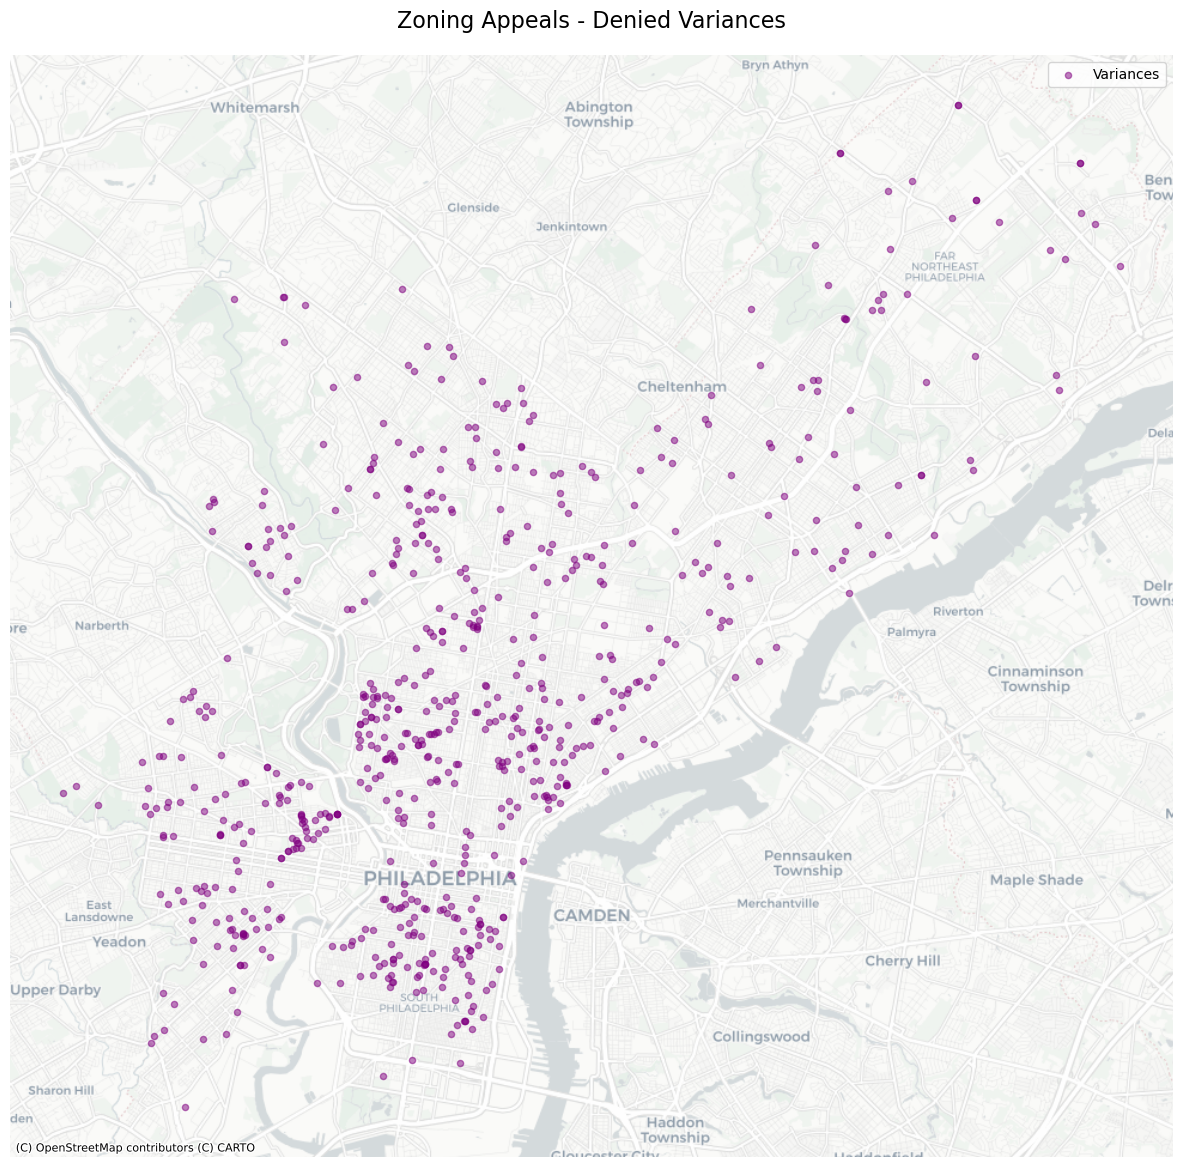

In [34]:
denied_appeals['longitude'], denied_appeals['latitude'] = transformer.transform(
    denied_appeals['geocode_x'].values, 
    denied_appeals['geocode_y'].values
)

geometry = [Point(xy) for xy in zip(denied_appeals['longitude'], denied_appeals['latitude'])]
denied_appeals_gdf = gpd.GeoDataFrame(denied_appeals, geometry=geometry, crs="EPSG:4326")

fig, ax = plt.subplots(figsize=(15, 15))

denied_appeals_gdf = denied_appeals_gdf.to_crs(epsg=3857)

denied_appeals_gdf.plot(ax=ax, 
             alpha=0.5, 
             c='purple',
             markersize=20,
             label='Variances')

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Plot customization
plt.title('Zoning Appeals - Denied Variances', fontsize=16, pad=20)
ax.set_axis_off()
plt.legend()

plt.show()

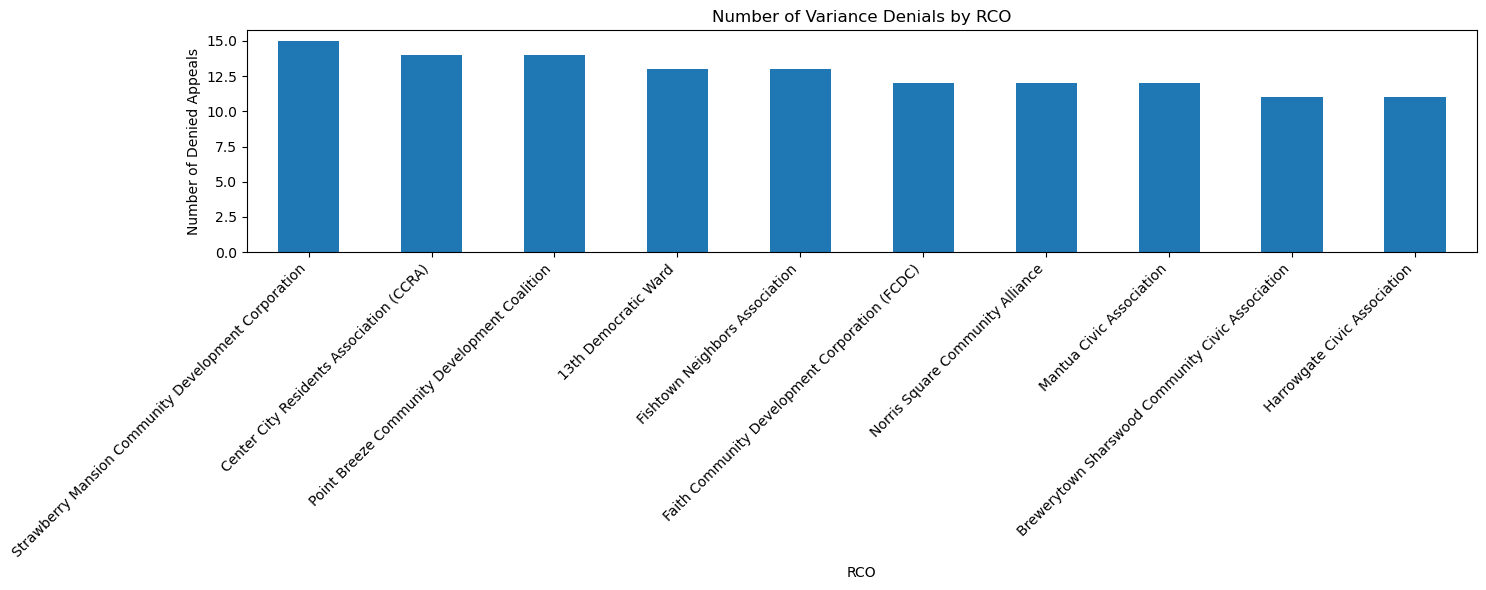

In [35]:
# Curious which RCOs have the most variance requests 
denied_appeals_by_rco = denied_appeals.groupby("coordinatingrco")['objectid'].count().sort_values(ascending=False).head(10) # Apparently there are a bunch of RCOs so only going to display top ten

denied_appeals_by_rco.plot(kind='bar', figsize=(15, 6))
plt.title('Number of Variance Denials by RCO')
plt.xlabel('RCO')
plt.ylabel('Number of Denied Appeals')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Coming back to this because I feel like this doesn't make sense... Mantua is zoned for multifamily already not sure why they have that many variance requests - maybe should expand the filter parameters 

In [40]:
denied_appeals_by_rco = denied_appeals_by_rco.reset_index()
denied_appeals_by_rco.columns = ['RCO', 'Number of Denied Appeals']
denied_appeals_by_rco.head()

RCO  Number of Denied Appeals
0  Strawberry Mansion Community Development Corpo...                        15
1           Center City Residents Association (CCRA)                        14
2       Point Breeze Community Development Coalition                        14
3                               13th Democratic Ward                        13
4                     Fishtown Neighbors Association                        13

In [42]:
denied_appeals_by_rco.to_csv('denied_appeals_by_rco.csv', index=False)

In [57]:
variances = appeals.groupby('coordinatingrco')['objectid'].count().sort_values(ascending=False)
variances = variances.reset_index()
variances.columns = ['RCO', 'Number of Variances']
variances.head()

RCO  Number of Variances
0  Brewerytown Sharswood Community Civic Association                   86
1                           Mantua Civic Association                   74
2    South of South Neighborhood Association (SOSNA)                   72
3                     Fishtown Neighbors Association                   67
4                   Norris Square Community Alliance                   66

In [58]:
variances.to_csv('variances.csv', index=False)

In [22]:
# Maybe explore properties dataset
base_url3 = "https://phl.carto.com/api/v2/sql"
query3 = """
SELECT * FROM opa_properties_public
"""

params3 = {
    "q":query3
}

results3 = requests.get(base_url3, params3)

data3 = results3.json()

props = pd.DataFrame(data3['rows'])

props.head()

cartodb_id                                           the_geom  \
0           1  0101000020E610000029C6C53D2BCC52C0DD31054E9CF7...   
1           2  0101000020E6100000B08BC01062CB52C0B80FFF2AA3FF...   
2           3  0101000020E61000001A1448DC39CB52C0DD45FFD4CBF4...   
3           4  0101000020E610000084BBFD1FCCCB52C0785516F4F9FE...   
4           5  0101000020E6100000D94623BCE3CA52C06001DBCC5EFB...   

                                the_geom_webmercator       assessment_date  \
0  0101000020110F0000D6E1D100F4ED5FC11AC63D999986...  2024-06-06T16:05:08Z   
1  0101000020110F0000F67827499EEC5FC1F75C95A67E8F...  2024-06-06T16:10:43Z   
2  0101000020110F000094715BFE59EC5FC164CB68B77B83...  2023-05-21T02:12:25Z   
3  0101000020110F0000150E447052ED5FC12914760FC38E...  2024-06-06T16:04:17Z   
4  0101000020110F00009EC95DB3C7EB5FC1430D34E8C38A...  2024-06-06T16:12:32Z   

  basements       beginning_point book_and_page building_code  \
0      None   SWC OF DICKINSON ST          None         SR      
1      None          NEC DOVER ST          None         SC      
2      None           NWC 16TH ST          None         T38     
3      None  343'7 1/8" W 31ST ST          None         SR      
4      None     197' W OF 19TH ST          None         ZL0     

   building_code_description category_code  ... utility view_type year_built  \
0  VACANT LAND RESIDE < ACRE            6   ...    None         I       None   
1  VACANT LAND COMMER < ACRE            6   ...    None         I       None   
2  ROW B/OFF-STR 2 STY STONE            3   ...    None         I       1950   
3  VACANT LAND RESIDE < ACRE            6   ...    None         I       None   
4  MISC FUNERAL HOME MASONRY            4   ...    None         A       1920   

  year_built_estimate zip_code  zoning         pin  building_code_new  \
0                None    19146    RSA5  1001202566               None   
1                None    19132    CMX1  1001321879               None   
2                None    19145    CMX1  1001408261                820   
3                None    19132    RSA5  1001168670               None   
4                None    19130     RM1  1001494378                246   

  building_code_description_new   objectid  
0                          None  589908380  
1                          None  589908381  
2  ROW MIXED-COM/RES-BLT AS RES  589908382  
3                          None  589908383  
4                  FUNERAL HOME  589908384  

[5 rows x 81 columns]

In [23]:
props.columns

Index(['cartodb_id', 'the_geom', 'the_geom_webmercator', 'assessment_date',
       'basements', 'beginning_point', 'book_and_page', 'building_code',
       'building_code_description', 'category_code',
       'category_code_description', 'census_tract', 'central_air',
       'cross_reference', 'date_exterior_condition', 'depth',
       'exempt_building', 'exempt_land', 'exterior_condition', 'fireplaces',
       'frontage', 'fuel', 'garage_spaces', 'garage_type',
       'general_construction', 'geographic_ward', 'homestead_exemption',
       'house_extension', 'house_number', 'interior_condition', 'location',
       'mailing_address_1', 'mailing_address_2', 'mailing_care_of',
       'mailing_city_state', 'mailing_street', 'mailing_zip', 'market_value',
       'market_value_date', 'number_of_bathrooms', 'number_of_bedrooms',
       'number_of_rooms', 'number_stories', 'off_street_open',
       'other_building', 'owner_1', 'owner_2', 'parcel_number', 'parcel_shape',
       'quality_grade'

## Granted Appeals

In [ ]:
decision = ['GRANTED', 'GRANTED/PROV', 'Complete', 'AFFIRMED', 'APPROVED', 'City Affirmed', 'Granted', 'SUSTAINED', 'CONTINUED' ,'Approved','Sustained',
            'Continued']
appeals = appeals[appeals['decisiondate'].notna()]
appeals['parcel_id_num'] = pd.to_numeric(appeals['parcel_id_num'], errors='coerce')
appeals = appeals[appeals['parcel_id_num'].notna()]
appeals['parcel_id_num'] = appeals['parcel_id_num'].astype(int)

approved_appeals = appeals[appeals['decision'].isin(decision)]
approved_appeals.head()

In [ ]:
#now get zoning values
zoning = ['RB_ZBA', 'Zoning Board of Adjustment']

zoning_appeals = approved_appeals[
    appeals['applicationtype'].isin(zoning)
]

zoning_appeals.head()

In [ ]:
apealscomplete = appeals[appeals['parcel_id_num'].isin(zoning_appeals['parcel_id_num'])].groupby('parcel_id_num')['decisiondate'].max().reset_index()
apealscomplete = apealscomplete.rename(columns={'decisiondate': 'conscomplete'})
apealscomplete.head()

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

geo_subset = appeals[['parcel_id_num', 'the_geom', 'decisiondate']].drop_duplicates('parcel_id_num')
finishappealsf = apealscomplete.merge(
    geo_subset[['parcel_id_num', 'the_geom']], 
    on='parcel_id_num', 
    how='left'
)


gdf = gpd.GeoDataFrame(finishappealsf,  geometry=gpd.GeoSeries.from_wkb(finishappealsf["the_geom"]), crs=4326)


# Create the map
fig, ax = plt.subplots(figsize=(12, 10))

# Plot points colored by completion year
gdf.plot(
    cmap='viridis',
    legend=True,
    ax=ax,
    markersize=20,
    alpha=0.7
)

# Add title and labels
plt.title('Appeals in Philadelphia by Completion Year', fontsize=15)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import contextily as ctx

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

gdf_projected = gdf.to_crs('EPSG:3857')

# Get the coordinates for the KDE
x = gdf_projected.geometry.x
y = gdf_projected.geometry.y

# Create a custom colormap (from light to dark blue)
colors = ["#f7fbff", "#deebf7", "#c6dbef", "#9ecae1", "#6baed6", "#4292c6", "#2171b5", "#08519c", "#08306b"]
cmap = LinearSegmentedColormap.from_list("blue_density", colors)

# Create and plot the KDE
kde = sns.kdeplot(
    x=x, 
    y=y,
    fill=True,
    alpha=0.8,
    cmap=cmap,
    levels=15,
    thresh=0.05,
    ax=ax
)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
ax.set_axis_off()
ax.set_title('Zoning Appeal Density in Philadelphia')

In [ ]:
districts = gpd.read_file('https://opendata.arcgis.com/api/v3/datasets/1ba5a5d68f4a4c75806e78b1d9245924_0/downloads/data?format=geojson&spatialRefId=4326&where=1%3D1')
appeals_dist = gpd.sjoin(gdf, districts, how='left', predicate='intersects')
dist_appeals = appeals_dist.groupby('DISTRICT').size().reset_index(name='count')
dist_appeals.head()

In [ ]:
from shapely.geometry import Point
import contextily as ctx

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

merged_data = districts.merge(dist_appeals, on='DISTRICT', how='left')
merged_data = merged_data.to_crs(epsg=3857)
merged_data.plot(column='count', 
                ax=ax1,
                legend=True,
                cmap='PuBu',
                legend_kwds={'label': 'Number of Appeals'},
                missing_kwds={'color': 'lightgrey'})

# Basemap
ctx.add_basemap(ax1, source=ctx.providers.CartoDB.Positron)
ax1.set_axis_off()
ax1.set_title('Zoning Appeals by District')

# Bar chart of change of use permits by district
dist_appeals.plot(kind='bar', ax=ax2)
ax2.set_title('Number of Zoning Appeals by Districts')
ax2.set_xlabel('Council District')
ax2.set_ylabel('Number of Appeals')

plt.tight_layout()
plt.show()